In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem
import seaborn 
#from pandas.tools.plotting import table
city = 'https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/city_data.csv'
ride = 'https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/ride_data.csv'
city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)


In [8]:
city_df.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [9]:
ride_df.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [11]:
#merge the two dataframes
pyber_df = pd.merge(ride_df, city_df, on="city", how="outer")
city_type = pyber_df["type"].unique()
city_type
#group by city and then find the average fare and number of ridew
city_group_df = pd.DataFrame(pyber_df)
city_group_df = city_group_df.groupby(["type", "city"])
city_fare_df = round(city_group_df.fare.agg(["count","mean"]),0)
city_fare_df.columns = ["Number of Rides", "Average Fare per Ride"]
city_fare_df["% of Total Rides"] = round(city_fare_df["Number of Rides"] / sum(city_fare_df["Number of Rides"]) * 100, 2)
city_fare_df["% of Total Fares"] = round(city_fare_df["Average Fare per Ride"] / sum(city_fare_df["Average Fare per Ride"]) * 100, 2)
city_fare_df.head(5)


Number of Rides  ...  % of Total Fares
type  city                             ...                  
Rural Bradshawfurt                 10  ...              1.19
      Garzaport                     3  ...              0.72
      Harringtonfort                6  ...              0.99
      Jessicaport                   6  ...              1.07
      Lake Jamie                    6  ...              1.02

[5 rows x 4 columns]

In [13]:
#group data by type only for piechart data
city_notype_df = pd.DataFrame(pyber_df)
city_notype_df = city_notype_df.groupby(["type"])
city_type_df = round(city_notype_df.fare.agg(["count","sum","mean"]),0)
city_type_df.columns = ["Number of Rides", "Total Revenue of Fares", "Average Fare per Ride"]
city_type_df["% of Total Rides"] = round(city_type_df["Number of Rides"] / sum(city_type_df["Number of Rides"]) * 100, 2)
city_type_df["% of Total Fares"] = round(city_type_df["Total Revenue of Fares"] / sum(city_type_df["Total Revenue of Fares"]) * 100, 2)
city_type_df.head(5)

,Number of Rides,Total Revenue of Fares,Average Fare per Ride,% of Total Rides,% of Total Fares
type,,,,,
Rural,125,4328.0,35.0,5.26,6.81
Suburban,625,19356.0,31.0,26.32,30.46
Urban,1625,39854.0,25.0,68.42,62.72


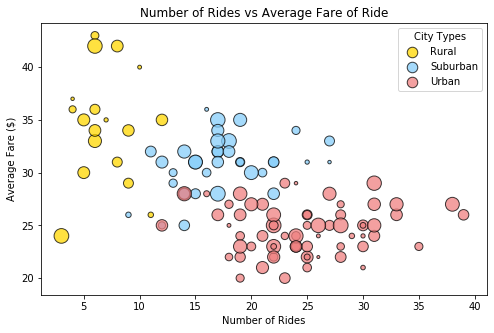

In [12]:

#split the data per city type
rural = city_fare_df.loc["Rural" , :]
urban = city_fare_df.loc["Urban" , :]
suburban = city_fare_df.loc["Suburban" , :]
drive1_df = pd.DataFrame(pyber_df)
drive2_df = drive1_df.drop_duplicates("city")
driver_count = drive2_df["driver_count"]
#find the total number of drivers per city
#how do i reset/make city and type the index (Like the two data frames above)
driver_df = pd.DataFrame(pyber_df)
driver_drop_df = driver_df.drop_duplicates("city")
driver_drop_df.head(126)
driver_drop_df = driver_drop_df.groupby("type")
driver_drop_df.head(200)
driver_count_df = driver_drop_df.driver_count.agg(["sum", "count"])
driver_count_df.columns = ["Drivers by City Type", "City Count"]
driver_count_df["% of Drivers Count"] = round(driver_count_df["Drivers by City Type"] / sum(driver_count_df["Drivers by City Type"]) * 100, 2)
driver_count_df
# Tells matplotlib that we want to make a scatter plot
x_axis1 = rural["Number of Rides"]
data1 = rural["Average Fare per Ride"]
x_axis2 = suburban["Number of Rides"]
data2 = suburban["Average Fare per Ride"]
x_axis3 = urban["Number of Rides"]
data3 = urban["Average Fare per Ride"]


plt.figure(figsize=(8,5))
plt.scatter(x_axis1, data1, marker="o", color="gold", edgecolors="black",
            s=driver_count*3, alpha=0.75)

plt.scatter(x_axis2, data2, marker="o", color="lightskyblue", edgecolors="black",
            s=driver_count*3, alpha=0.75)

plt.scatter(x_axis3, data3, marker="o", color="lightcoral", edgecolors="black",
            s=driver_count*3, alpha=0.75)

plt.title("Number of Rides vs Average Fare of Ride")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare ($)")
plt.legend(labels=('Rural','Suburban','Urban'), loc='best', title='City Types')
plt.style.use("seaborn-bright")
#print(plt.style.available)
plt.show()

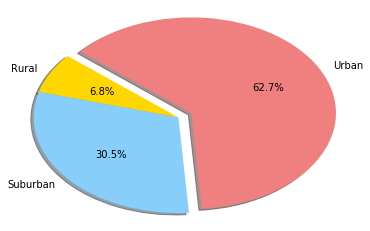

In [2]:
# Labels for the sections of our pie chart
labels = city_type_df.index.values

# The values of each section of the pie chart
sizes =city_type_df["% of Total Fares"]

# The colors of each section of the pie chart
colors = ['gold','lightskyblue','lightcoral']

explode = [0,0,0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("tight")

plt.show()

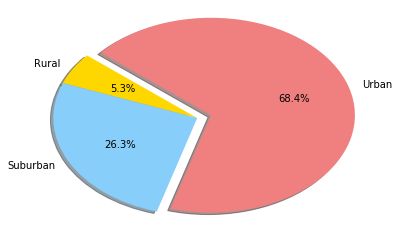

In [3]:
# Labels for the sections of our pie chart
labels = city_type_df.index.values

# The values of each section of the pie chart
sizes =city_type_df["% of Total Rides"]

# The colors of each section of the pie chart
colors = ['gold','lightskyblue','lightcoral']

explode = [0,0,0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("tight")

plt.show()

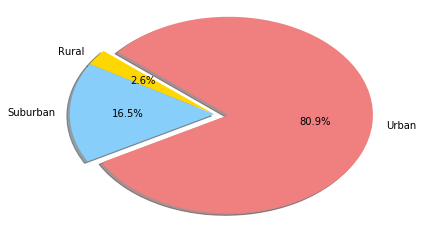

In [0]:
# Labels for the sections of our pie chart
labels = driver_count_df.index.values

# The values of each section of the pie chart
sizes =driver_count_df["% of Drivers Count"]

# The colors of each section of the pie chart
colors = ['gold','lightskyblue','lightcoral']

explode = [0,0,0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("tight")

plt.show()